In [18]:
x = rnorm(100)
summary(x)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.91729 -0.71709 -0.03383 -0.05990  0.43220  3.28879 

In [19]:
library(readxl)

In [20]:
# A real estate agency collects data concerning
  # house sales prices ($1000s) and house sizes (100s of square feet).

houses <- read_excel("Houses.xlsx", na = "NA", col_names = TRUE)
houses

Price,Size
180.0,23
98.1,11
173.1,20
136.5,17
141.0,15
165.9,21
193.5,24
127.8,13
163.5,19
172.5,25


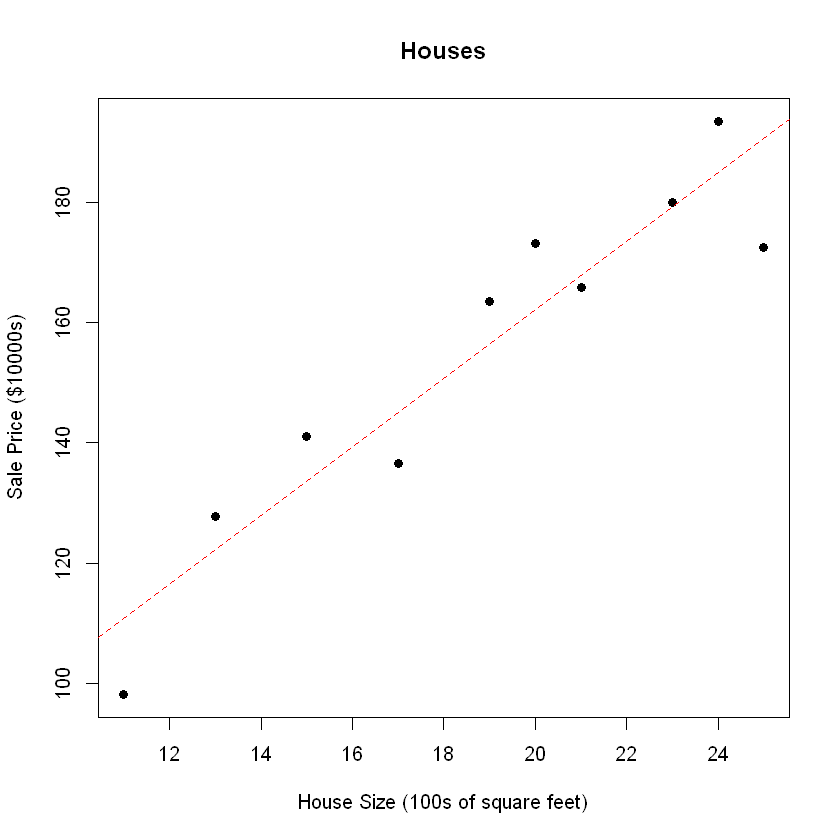

In [21]:
# scatter plot w/ fitted linear regression line

plot(houses$Size, houses$Price, pch = 16, main = "Houses", xlab = "House Size (100s of square feet)",
    ylab = "Sale Price ($10000s)")
abline(lm(houses$Price ~ houses$Size), lty = 2, col = "red")

In [22]:
# fit the model

linefit1 <- lm(houses$Price ~ houses$Size)

# to see an information summary of the fitted model
summary(linefit1)


Call:
lm(formula = houses$Price ~ houses$Size)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.032  -6.780   3.270   7.396  11.070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  48.0244    14.4135   3.332   0.0104 *  
houses$Size   5.7003     0.7457   7.644 6.05e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.59 on 8 degrees of freedom
Multiple R-squared:  0.8796,	Adjusted R-squared:  0.8645 
F-statistic: 58.43 on 1 and 8 DF,  p-value: 6.05e-05


In [23]:
# to see the coefficient of determination R-squared
summary(linefit1)$r.squared

[1] 0.8795784

In [24]:
# the observed residuals, epsilon-hats
resids <- residuals(linefit1)
print(resids)

         1          2          3          4          5          6          7 
  0.868750 -12.627679  11.069643  -8.429464   7.471131  -1.830655   8.668452 
         8          9         10 
  5.671726   7.169940 -18.031845 


In [25]:
# standard deviation of the residuals = sqrt(MSE)
summary(linefit1)$sigma

[1] 10.58797

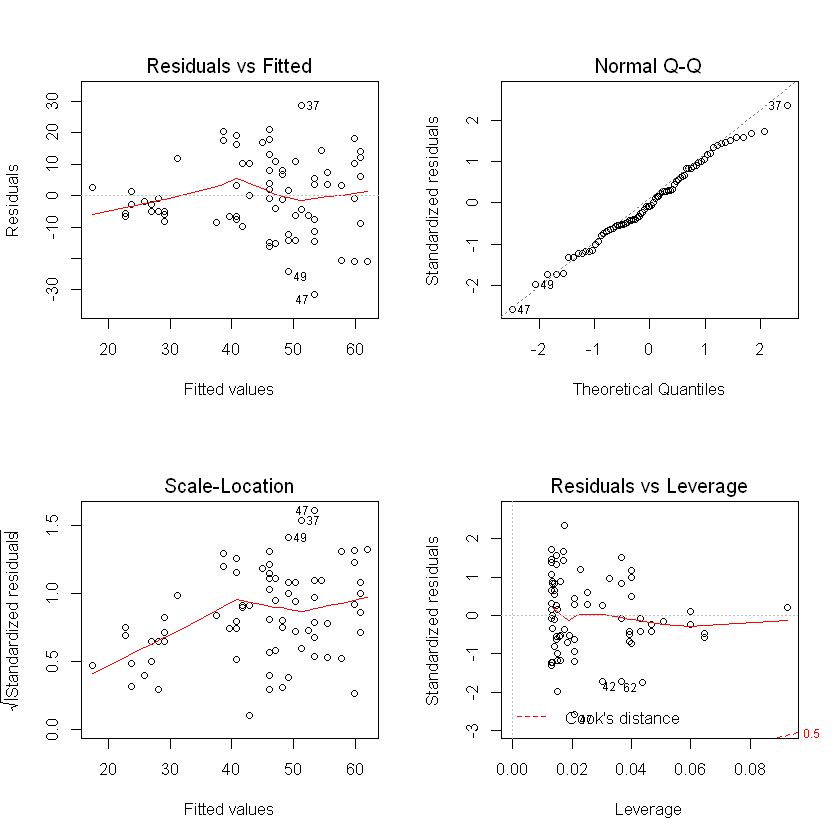

In [26]:
par(mfrow = c(2, 2))
plot(lm(Starbucks$carb ~ Starbucks$calories))
#plot(lm(cal100s ~ Starbucks$carb))

# R6-1. Starbucks 1. 
# Starbucks only lists the number of calories on the display items. We are interested in predicting the amount of carbohydrates (in grams) for a menu item based on its calorie content (measured in 100s). The data are in the file starbucks.xlsx.

In [1]:
library(readxl)
Starbucks <- read_excel("starbucks.xlsx", na = "NA", col_names = TRUE)
head(Starbucks, 5)

attach(Starbucks)
#cal100s <- Starbucks$calories*100
#print(cal100s)

item,calories,fat,carb,fiber,protein,type
8-Grain Roll,3.5,8,67,5,10,bakery
Apple Bran Muffin,3.5,9,64,7,6,bakery
Apple Fritter,4.2,20,59,0,5,bakery
Banana Nut Loaf,4.9,19,75,4,7,bakery
Birthday Cake Mini Doughnut,1.3,6,17,0,0,bakery


# A.  Graph the data - is a linear relationship indicated?

In [3]:
min(calories)

[1] 0.8

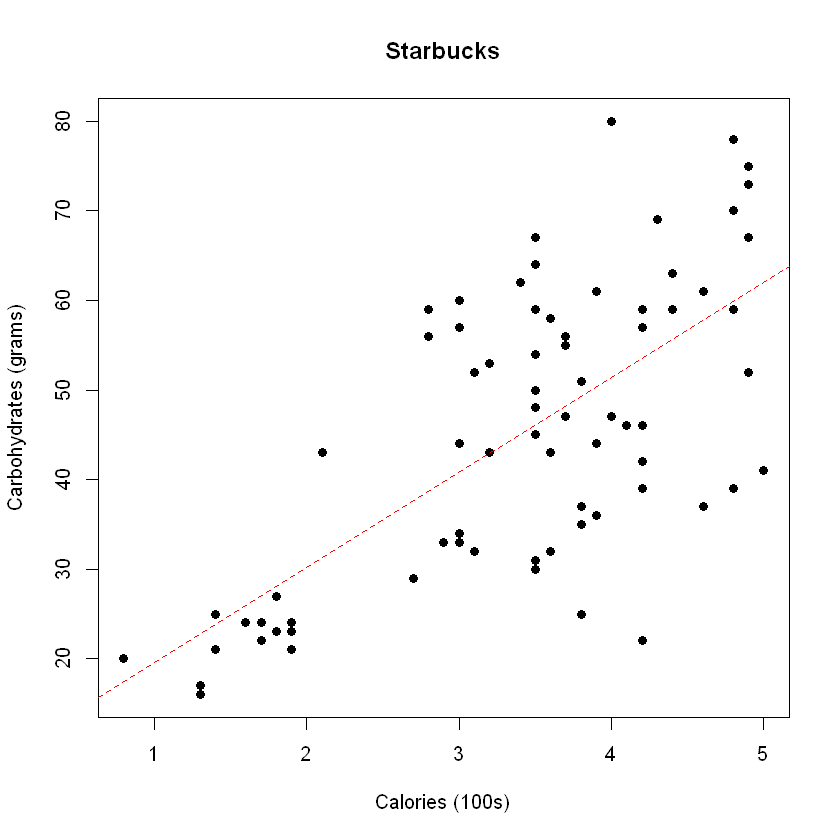

In [2]:
plot(calories, carb, pch = 16, main = "Starbucks", xlab = "Calories (100s)", ylab = "Carbohydrates (grams)")
abline(lm(carb ~ calories), lty = 2, col = "red")

# Yes, when you plot the data and look at the fitted regression line, it indicates a relationship
# Higher calories content = More Carbs

# b) Fit the linear model to the data. Interpret 𝛽𝛽̂0 and 𝛽𝛽̂1 in the problem context

In [4]:
linefitStarbucks <- lm(carb ~ calories)

summary(linefitStarbucks)

coefficients(linefitStarbucks)


Call:
lm(formula = carb ~ calories)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.477  -7.476  -1.029  10.127  28.644 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.944      4.746   1.884   0.0634 .  
calories      10.603      1.338   7.923 1.67e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.29 on 75 degrees of freedom
Multiple R-squared:  0.4556,	Adjusted R-squared:  0.4484 
F-statistic: 62.77 on 1 and 75 DF,  p-value: 1.673e-11


(Intercept)    calories 
    8.94356    10.60309

In [ ]:
# Linear model hypothesis : y = B0 + B1X + e

# what is mu for the process? Mu~y/x = B0 + B1X

# linear model for sample: y^ = B^0 + B^1X
# fitted lines have estimates of means for different values of x

# for B0, the following applies
# it has to be logically meaningful, in this case it is ok since things can have zero
# half a standard deviation below - cautious about interpretation, but this is outside the data range
# don't bother intrepreting this value

# if its in the range, zero calorie muffins in the data set, this is the estimate of the number of carbs
# (8.94) for any item that has zero calories

# B1 interpretation
# For every 100 calories, we see an increase 10.603 carbs in the menu item

# B0 = 8.94356 - when X = 0, meaningless

# c) Find and interpret the coefficient of determination ( R2 ) .

In [5]:
print(summary(linefitStarbucks)$r.squared)

[1] 0.4556237


# About 45% of the variability in the value of carbs in a Starbucks menu item can be explained by its calorie amount.

In [32]:
# 45%  of the variability in carbs can be explained by its calorie amount
# this is removing the variability from Y (carbs) by using X as a determining

# Proportion of variation in Y that is explained by model (and variation in {Xi})
# Range [0, 1]
# 0 means it explains 0% of the variation in Y, meaning there is no relationship between these variables
# R^2 of 1 means it is explaining all of the varation in Y, which means there is a perfect relationship

# d) Find s = SQRT(MSE) and interpret in context

In [6]:
summary(linefitStarbucks)$sigma

[1] 12.29325

In [34]:
# s is the measure of the variability that is unexplained
# sε estimates the standard deviation σ of the normal random variable ε in the model.
# Its meaning is that among all menu items in the sample Starbucks, the standard deviation of their calorie amount is about 12.3 points. 
# Such a large value means that the final exam scores of each sub-population of menu items, based on the # of carbs, are highly variable.

# Standard deviation of the sample errors, or in this context, the observed residuals
# The epilsons represent that part of Y that is not captured by the relationship of the X values (predictor variables)
# r^2 is adjusted to how many predictor variables there are in the model

# e) Run the anova function on the fitted line (the result of the model lm). 
    ## Connect the results to Parts (c)and (d).

In [7]:
print(anova(linefitStarbucks))

Analysis of Variance Table

Response: carb
          Df  Sum Sq Mean Sq F value    Pr(>F)    
calories   1  9486.4  9486.4  62.772 1.673e-11 ***
Residuals 75 11334.3   151.1                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [66]:
# H0: B1 = 0 (no relationship)
# Ha: Ba =/= 0 (relationship)
# Conclude that there is a relationship between x and y

# Large F value, we can conclude that Ha is true, that there is a relationship between Carbs and Calories
# we took our interval variability and took that split it into two pieces, top and bottom
# this is the ratio of variation because of the Xes
# this is a sample statistic

9486.4 / (9486.4  + 11334.3) # this is c.
sqrt(151.1) # this is d.

[1] 0.4556235

[1] 12.29227

# f) Find the residuals for the items Apple Bran Muffin and Apple Fritter. Interpret the values in context.

In [8]:
head(Starbucks, 5)

item,calories,fat,carb,fiber,protein,type
8-Grain Roll,3.5,8,67,5,10,bakery
Apple Bran Muffin,3.5,9,64,7,6,bakery
Apple Fritter,4.2,20,59,0,5,bakery
Banana Nut Loaf,4.9,19,75,4,7,bakery
Birthday Cake Mini Doughnut,1.3,6,17,0,0,bakery


In [82]:
resids <- residuals(linefitStarbucks) 
print(resids[2:3])

        2         3 
17.945629  5.523467 


In [86]:
coffee = data.frame(Starbucks)
subset(coffee, item == "Apple Bran Muffin",
      select = c(resids))

ERROR: Error in x[j]: only 0's may be mixed with negative subscripts


In [ ]:
# y - y^

# g) Obtain a point estimate of the carbohydrates of an item with 200 calories.

In [67]:
point_estimate <- 8.944 + (10.603 * 2)
print(point_estimate)
new.dat <- data.frame(calories=2)

predict(linefitStarbucks, new.dat, interval = 'predict')

[1] 30.15


,fit,lwr,upr
1,30.14974,5.225474,55.074


In [ ]:
# remember what scale you are using

Warning message in predict.lm(linefitStarbucks, interval = "predict", level = 0.9):
"predictions on current data refer to _future_ responses
"

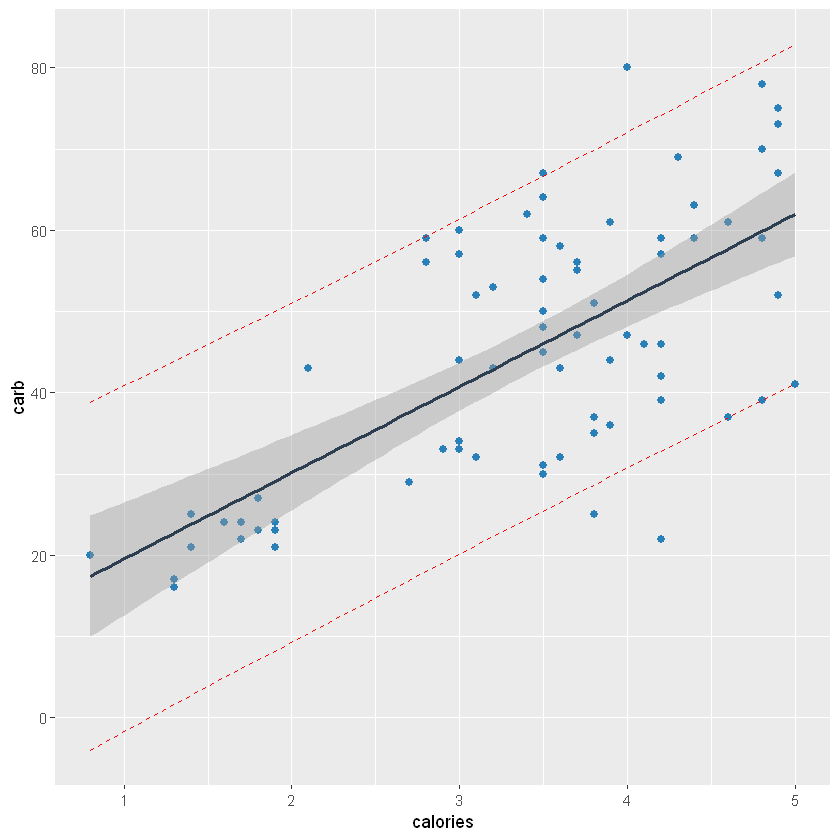

In [68]:
predict_df <- predict(linefitStarbucks, interval = 'predict', level = .90)

merged_df <- cbind(Starbucks, predict_df)


ggplot(merged_df, aes(x=calories, y=carb)) + 
 geom_point(color='#2980B9', size = 2) +
 geom_line(aes(y=lwr), color = "red", linetype = "dashed")+
 geom_line(aes(y=upr), color = "red", linetype = "dashed")+
 geom_smooth(method=lm, color='#2C3E50')

# R6-2. Starbucks 2

# h) Do the data provide evidence of a relationship between calories and carbohydrates? State the null and alternative hypotheses, report the p-value, and state your conclusion.

* Ho = there is no relationship between calories and carbohydrates; B1 = 0
* Ha = there is a **relationship** between calories and carbohydrates; B1 =/= 0
* There is little chance that we would obtain this sample, if in fact there is no relationship

# i) Calculate the 90% confidence intervals for β0 and β1 and interpret them in context.

In [11]:
print(confint(linefitStarbucks, level = .90))

                 5 %     95 %
(Intercept) 1.039446 16.84767
calories    8.374277 12.83190


In [ ]:
# B0 has no interpretation, so its pointless, this would be 

# We are 90% confident that, among all Starbucks menu items,
# for every 100 calories, a menu item
# goes up by between 8.37 and 12.83 carbs if in fact the sample data set reflects the population is correct

# R6-3. Starbucks 3

# j) What assumptions are needed for the regression analyses done above?

In [41]:
# Random sampling (our sample data came from an unbiased sampling of the process)
# Process stability (we're assuming that the process and the relationships in that process are relatively stable)
# Ei ~ Normal(Mean 0, SD o): Epilson terms that they are normally distributed across all values of the predictors
# E ~ N(0, o2) for all (Xi) - We're assuming all the epilsons are normally distributed across all values of X
# Y = Uy + e
# epilson hats are estimates of epilson and can be used to test the assumptions about epilson

# Standardized residual are the z-scores of the residuals
# Normality test on the standardized residuals - is there anything wrong with our assumption of normality?

# k) Check the assumptions using the standardized residuals.

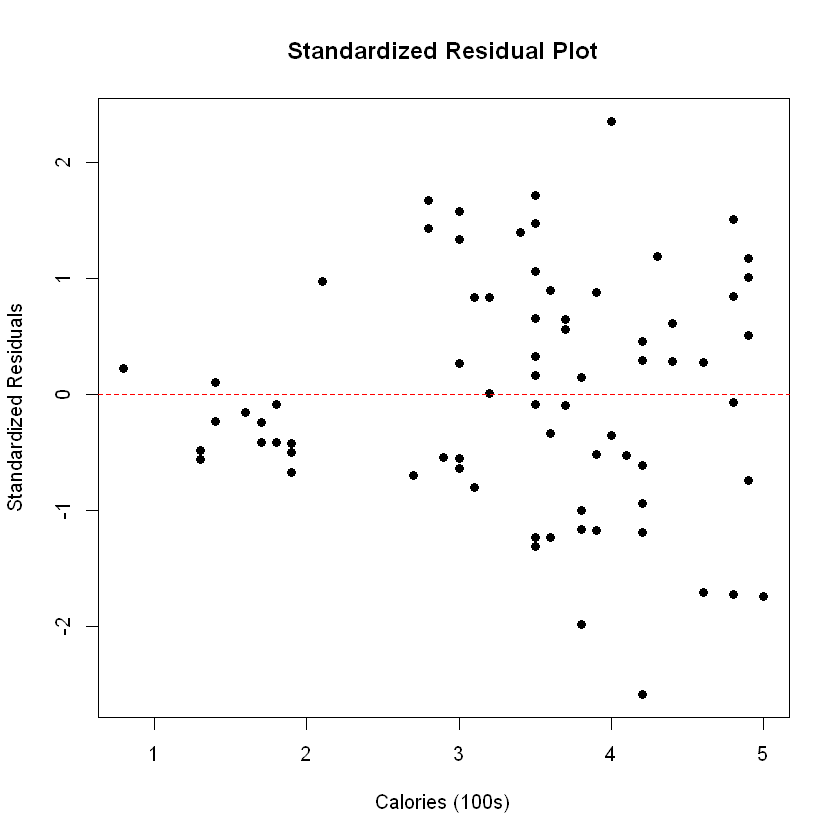

In [90]:
linefitStarbucks.stres <- rstandard(linefitStarbucks)
plot(Starbucks$calories, linefitStarbucks.stres, pch = 16, main = "Standardized Residual Plot", 
     xlab = "Calories (100s)", ylab = "Standardized Residuals")
abline(0,0, lty=2, col="red")

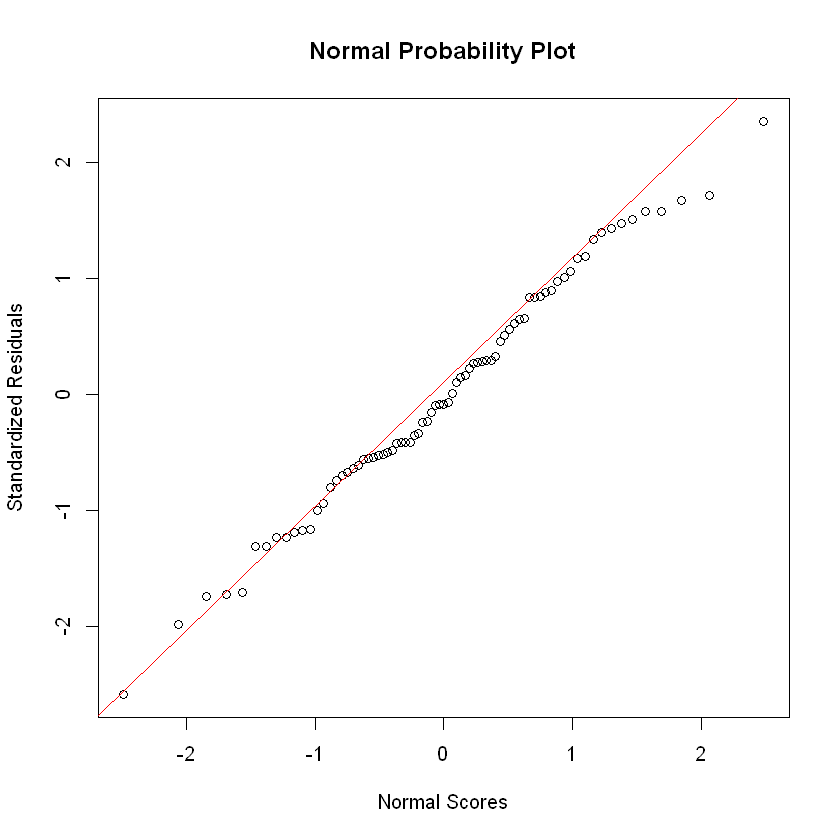

In [14]:
qqnorm(linefitStarbucks.stres, main = "Normal Probability Plot", xlab = "Normal Scores", ylab = "Standardized Residuals")
qqline(linefitStarbucks.stres, col = "red")

In [15]:
print(shapiro.test(linefitStarbucks.stres))


	Shapiro-Wilk normality test

data:  linefitStarbucks.stres
W = 0.99032, p-value = 0.832



# R6-4. Starbucks 4

# l) Find an interval for the carbohydrate amount of a product having 450 calories with 90% confidence. Interpret the interval.

In [92]:
#attach(Starbucks)
linefit_2 <- lm(carb ~ calories)
newdata <- data.frame(calories = 4.5)

# 90% prediction interval for carbs amount for a single product having 450 Calories
print(predict(linefit_2, newdata, interval="predict", level = .90))

       fit      lwr     upr
1 56.65746 35.90302 77.4119


In [93]:
# 90% prediction interval for carbs amount for any product that has 450 calories
print(predict(linefit_2, newdata, interval="confidence", level = .90))

       fit      lwr      upr
1 56.65746 53.25409 60.06083


In [ ]:
# We are 90% confident that, for Starbucks items that have 450 calories,
# We are 90% confident that we obtained an interval for a single Starbuck item that has 450 calories
# they will average 56.66 carbs, in the range of 35.90 and 77.41 carbs if in fact the sample data set reflects the population.
# [35.90, 77.41]
# for Y/X = 4.5

In [20]:
library("ggplot2")

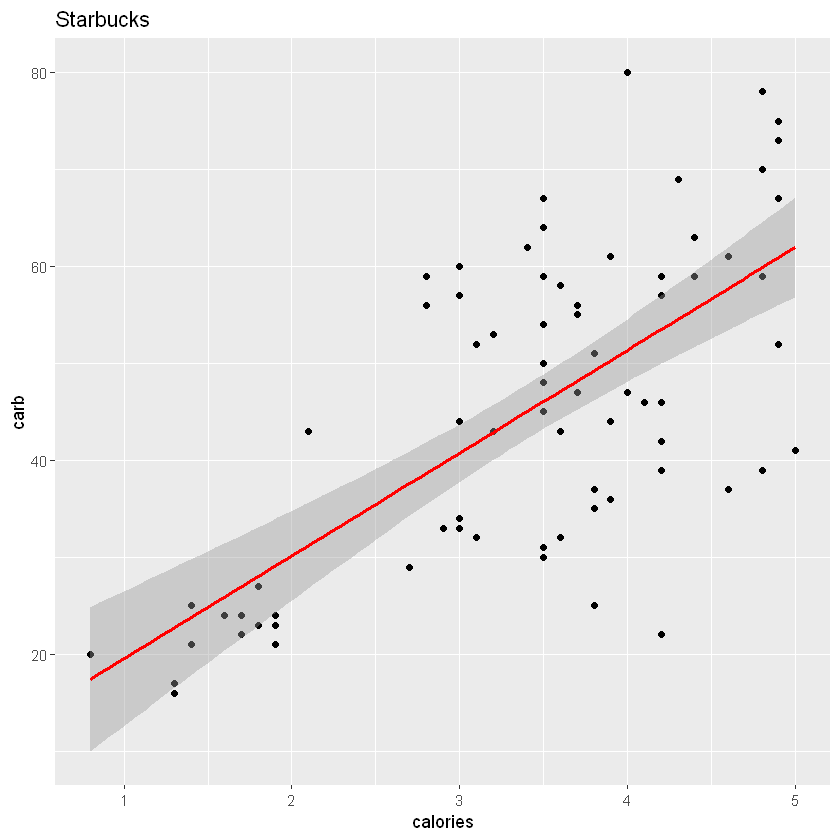

In [40]:
slope <- linefit_2$coefficients[2]
y_intercept = linefit_2$coefficients[1]

ggplot(Starbucks, aes(calories, carb)) + 
    geom_point() +
#    geom_abline(slope = slope, intercept = y_intercept, lty = 2, col = 'red')
    geom_smooth(method='lm', col = 'red') +
    labs(title = 'Starbucks')

In [44]:
detach(Starbucks)

In [ ]:
# read dataset
df = mtcars

# create multiple linear model
lm_fit <- lm(mpg ~ cyl + hp, data=df)
summary(lm_fit)

# save predictions of the model in the new data frame 
# together with variable you want to plot against
predicted_df <- data.frame(mpg_pred = predict(lm_fit, df), hp=df$hp)

# this is the predicted line of multiple linear regression
ggplot(data = df, aes(x = mpg, y = hp)) + 
  geom_point(color='blue') +
  geom_line(color='red',data = predicted_df, aes(x=mpg_pred, y=hp))

In [46]:
# Multiple Regression
    # Data file: see file for documentation

In [47]:
drywall <- read_excel("Drywall.xlsx", na = "NA", col_names = TRUE)

# Shorthand to allow referring to dataframe columns without stating the dataframe name

In [48]:
attach(drywall)

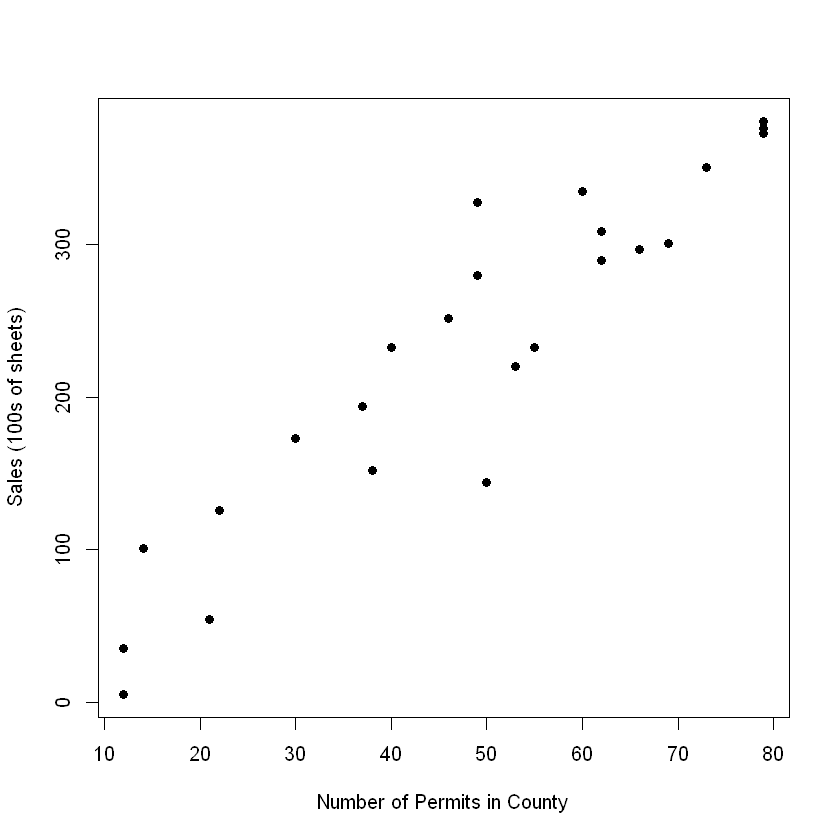

In [49]:
plot(Permits, Sales, pch = 16, xlab = "Number of Permits in County", ylab = "Sales (100s of sheets)")

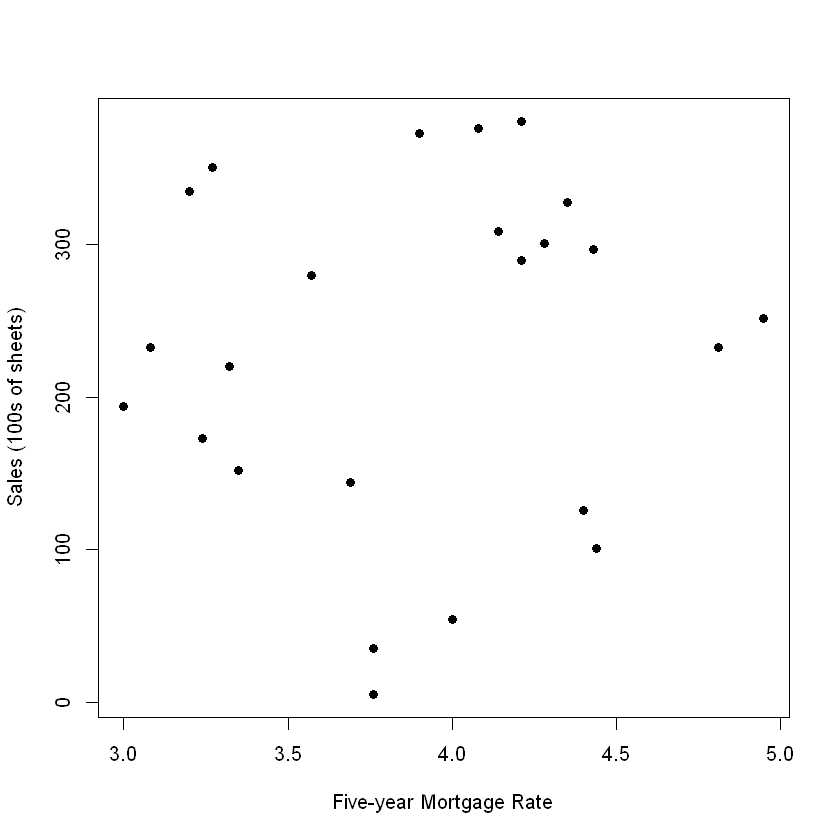

In [50]:
plot(Mortgage, Sales, pch = 16, xlab = "Five-year Mortgage Rate", ylab = "Sales (100s of sheets)")

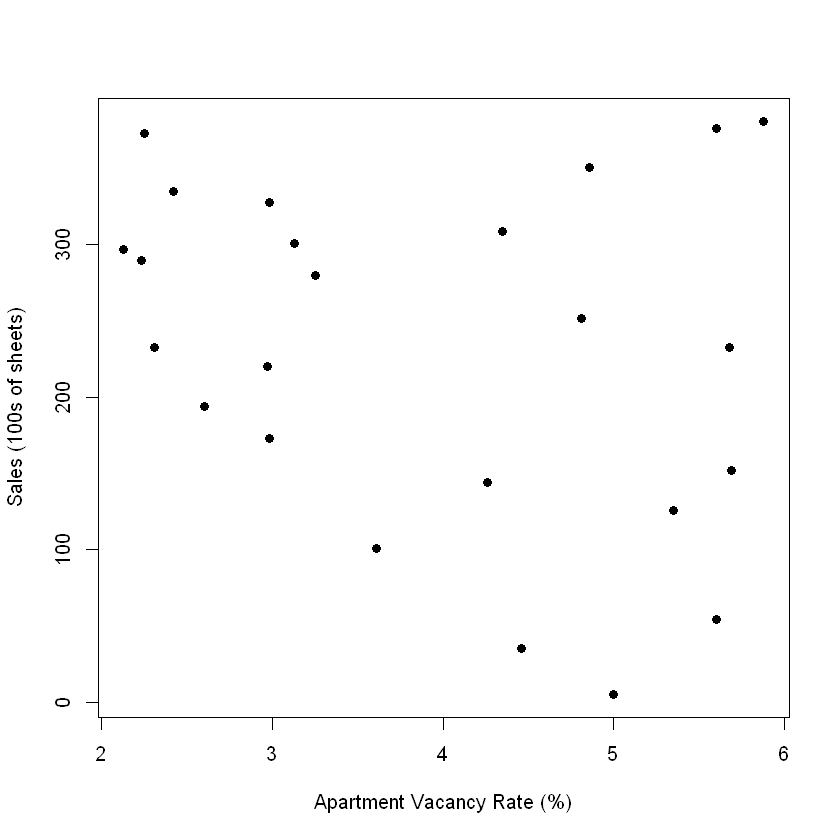

In [51]:
plot(A_Vacancy, Sales, pch = 16, xlab = "Apartment Vacancy Rate (%)", ylab = "Sales (100s of sheets)")

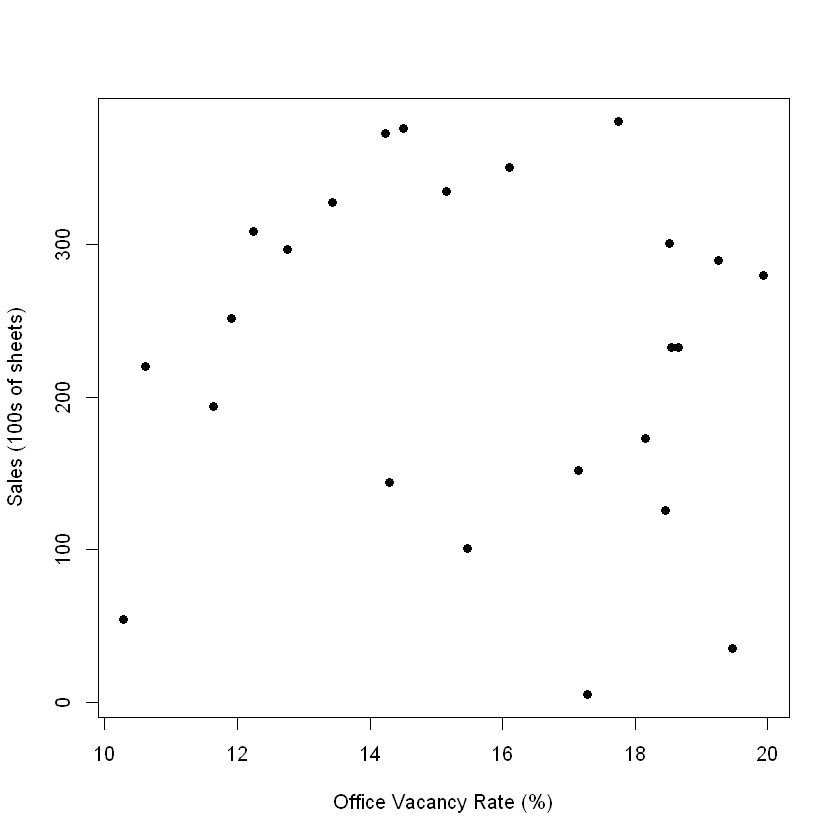

In [52]:
plot(O_Vacancy, Sales, pch = 16, xlab = "Office Vacancy Rate (%)", ylab = "Sales (100s of sheets)")

In [53]:
# fit the model linefit4 <- lm(Sales ~ Permits + Mortgage + A_Vacancy + O_Vacancy)
linefit4 <- lm(Sales ~ Permits + Mortgage + A_Vacancy + O_Vacancy)

# information summary of the fitted model summary(linefit4)
summary(linefit4)


Call:
lm(formula = Sales ~ Permits + Mortgage + A_Vacancy + O_Vacancy)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.822 -25.351   9.409  22.602  78.391 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -43.873     83.213  -0.527    0.604    
Permits        4.763      0.395  12.057 2.39e-10 ***
Mortgage      16.988     15.159   1.121    0.276    
A_Vacancy    -10.528      6.394  -1.646    0.116    
O_Vacancy      1.308      2.791   0.469    0.645    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40.13 on 19 degrees of freedom
Multiple R-squared:  0.8935,	Adjusted R-squared:  0.8711 
F-statistic: 39.86 on 4 and 19 DF,  p-value: 5.448e-09


In [54]:
# the observed residuals, epsilon-hats
residsMR <- residuals(linefit4)
print(residsMR)

         1          2          3          4          5          6          7 
 78.390864  14.256410 -20.600557 -86.822107  22.822671 -27.580036  22.528809 
         8          9         10         11         12         13         14 
-47.759222 -24.607992  27.740794  15.757952  26.559573  -4.549211  21.712180 
        15         16         17         18         19         20         21 
 -1.870581 -20.658747 -34.671535 -42.122439  44.388902  37.969736  20.533014 
        22         23         24 
-42.999311  17.018283   4.562549 


In [55]:
# standard deviation of the residuals = sqrt(MSE)
summary(linefit4)$sigma

[1] 40.13239

In [56]:
detach(drywall)

In [57]:
# A real estate agency collects data concerning 
# house sales prices ($1000s) and house sizes (100s of square feet). 
#install readxl package first

library(readxl)
houses <- read_excel("Houses.xlsx", na="NA", col_names = TRUE)